### Угадываем признак

In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [56]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [57]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [58]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [59]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [62]:
X = data.drop(['sex'], axis=1)
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [63]:
y = data['sex']

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [65]:
ft = ohe.fit_transform(data[['nationality', 'sport']])

In [66]:
ft.toarray().shape

(10858, 227)

In [67]:
ohe.transform(data[['nationality', 'sport']])

<10858x227 sparse matrix of type '<class 'numpy.float64'>'
	with 21716 stored elements in Compressed Sparse Row format>

In [68]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [69]:
le.fit( data['sex'] )

LabelEncoder()

In [70]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [71]:
model = LogisticRegression()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=800)
X_train.head(5)

,height,weight,gold,silver,bronze
3128,1.63,52.0,0,0,0
2611,1.90,87.0,0,0,0
148,1.62,65.0,0,0,0
27,1.85,75.0,0,0,0
8908,1.75,65.0,0,0,0


In [73]:
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
from sklearn.metrics import roc_curve

In [75]:
# predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]

In [76]:
predictions

array([0.18481391, 0.0810495 , 0.74539919, ..., 0.88242643, 0.92848334,
       0.2335515 ])

In [77]:
np.where(predictions >= 1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
fpr, tpr, thres = roc_curve( y_test, predictions)

In [79]:
from matplotlib import pyplot as plt

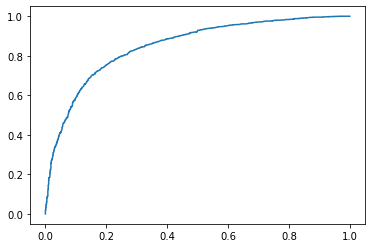

In [80]:
plt.plot( fpr, tpr )

In [81]:
fpr

array([0.        , 0.        , 0.        , ..., 0.97733333, 0.97866667,
       1.        ])

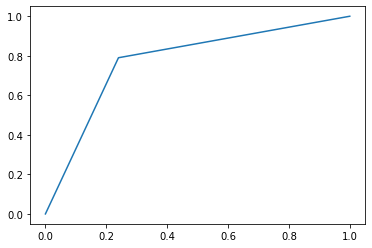

In [82]:
fpr, tpr, thres = roc_curve( y_test, model.predict(X_test))
plt.plot( fpr, tpr )

In [83]:
tpr.shape

(3,)

In [84]:
tpr.shape

(3,)

In [85]:
tpr

array([0.        , 0.79010239, 1.        ])

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
roc_auc_score(y_test, predictions)

0.8502499051952976

In [88]:
roc_auc_score(y_test, model.predict(X_test))

0.7750511945392492

In [97]:
def roc_curve(y_true, y_prob, thresholds):

    fpr2 = []
    tpr2 = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr2.append(fp / (fp + tn))
        tpr2.append(tp / (tp + fn))

    return [fpr2, tpr2]

In [90]:
thresholds = np.arange(0.0, 1.01, .01)

In [107]:
roc_curve2 = roc_curve(y_test, predictions, thresholds)

In [110]:
fpr2 = roc_curve2[0]

In [111]:
tpr2 = roc_curve2[1]

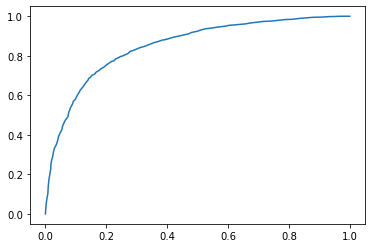

In [112]:
plt.plot(fpr2, tpr2)